In [1]:
# Sneha Dubey
# Dr. Chen
# CSCI 184
# 8 June 2024
# Homework 4

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [3]:
# Ignoring convergence warnings (unnecessary output)
# This cell was obtained from stack overflow and not written by me
# All of the other cells were coded by me
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
# Step 1: Data Loading & Splitting

In [5]:
# Setting up train/test data
trainData = pd.read_csv('monks-1.train', header = None)
testData = pd.read_csv('monks-1.test', header = None)

targetTrain = trainData[0].values
featureTrain = trainData.drop(columns=[0]).values
targetTest = testData[0].values
featureTest = testData.drop(columns=[0]).values

scaler = StandardScaler()
featureTrain = scaler.fit_transform(featureTrain)
featureTest = scaler.transform(featureTest)

In [6]:
# Step 2: Training & Evaluation

In [7]:
# Training
numEpochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
sgdAccuracies = []
adamAccuracies = []

for num in numEpochs:
    # SGD
    sgdNN = MLPClassifier(hidden_layer_sizes = (8, 6), activation = 'relu', solver = 'sgd', learning_rate_init = 0.01, max_iter = num)
    sgdNN.fit(featureTrain, targetTrain)
    sgdAccuracy = sgdNN.score(featureTest, targetTest)
    sgdAccuracies.append(sgdAccuracy)

    # Adam
    adamNN = MLPClassifier(hidden_layer_sizes = (8, 6), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = num)
    adamNN.fit(featureTrain, targetTrain)
    adamAccuracy = adamNN.score(featureTest, targetTest)
    adamAccuracies.append(adamAccuracy)

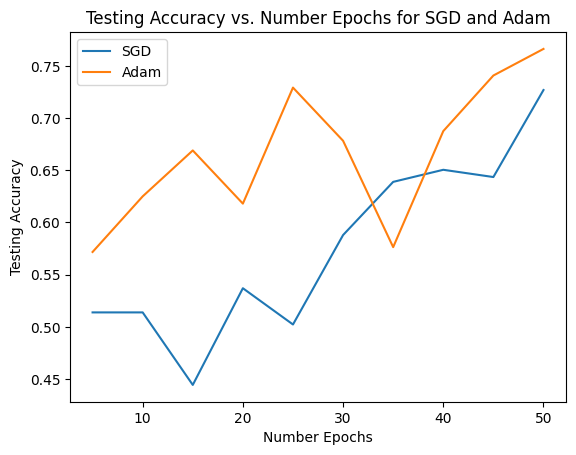

In [8]:
# Plotting the results
plt.plot(numEpochs, sgdAccuracies, label = 'SGD')
plt.plot(numEpochs, adamAccuracies, label = 'Adam')
plt.xlabel('Number Epochs')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. Number Epochs for SGD and Adam')
plt.legend()
plt.show()